<a href="https://colab.research.google.com/github/monalasma/Python_individual_first/blob/main/10_08_correlation_seaborn_lib_TEAMWORK_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#correlation - express two relations like x and y
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pokemon_df = pd.read_csv('/content/Pokemon.csv')
pokemon_df.head(n=5)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<function matplotlib.pyplot.show(close=None, block=None)>

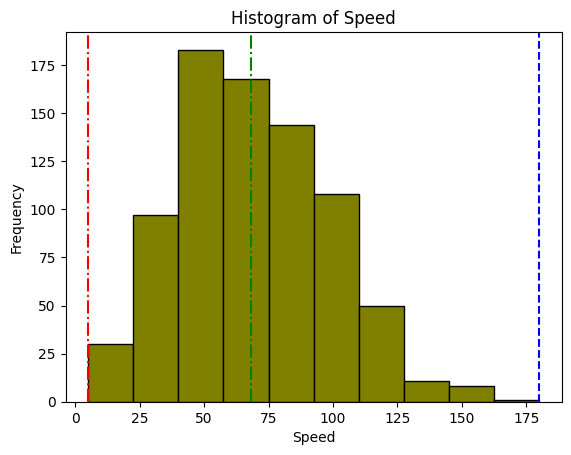

In [9]:
#histogram of column Speed
plt.hist(pokemon_df['Speed'], color ='olive', edgecolor= 'black')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Speed')
plt.axvline(pokemon_df['Speed'].min(), linestyle = 'dashdot', color='red')
plt.axvline(pokemon_df['Speed'].max(), linestyle = 'dashed', color = 'blue')
plt.axvline(pokemon_df['Speed'].mean(), linestyle = 'dashdot', color='green')
plt.show

CORRELATION -

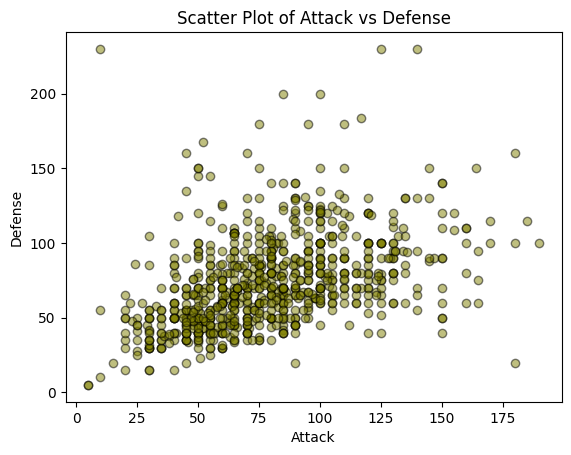

In [10]:
#SCATTER PLOT between two variable in pokemon file
plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color = 'olive', edgecolor= 'black', alpha = 0.5)
plt.xlabel ('Attack')
plt.ylabel ('Defense')
plt.title ('Scatter Plot of Attack vs Defense')
plt.show()


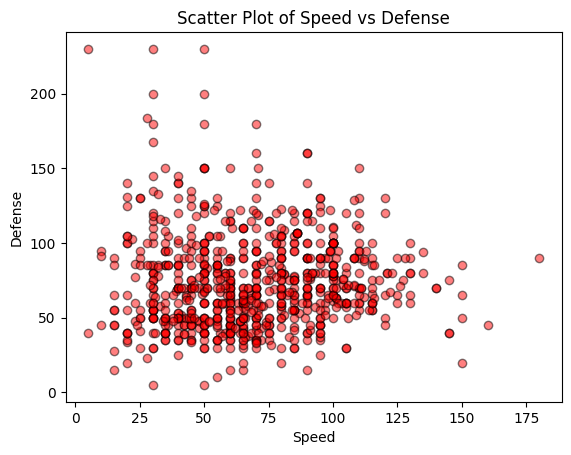

In [13]:
#SPEED VS DEFENSE
plt.scatter(pokemon_df['Speed'], pokemon_df ['Defense'], color = 'red', edgecolor='black', alpha =0.5)
plt.xlabel ('Speed')
plt.ylabel ('Defense')
plt.title ('Scatter Plot of Speed vs Defense')
plt.show()

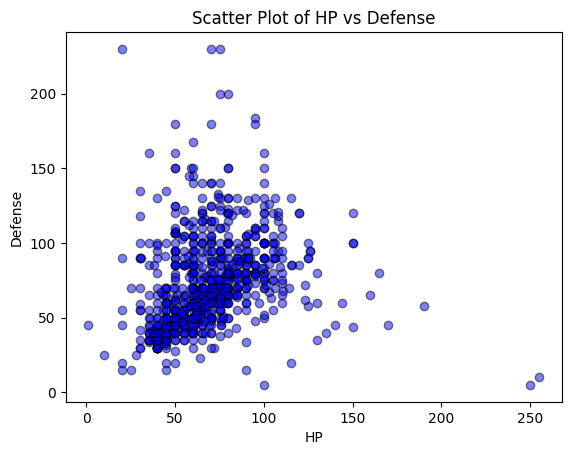

In [15]:
#HP VS DEFENSE
plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color ='blue', edgecolor='black', alpha = 0.5)
plt.xlabel ('HP')
plt.ylabel ('Defense')
plt.title ('Scatter Plot of HP vs Defense')
plt.show()

In [17]:
#PEARSON CORRELATION - relationship between two variables, result will be between of this correlation -1 and 1.
# -1 = perfect negative relationship
# 1 = perfect positive relationship
# 0 = no relationship, don't interact with each other

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
print(correlation1)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print(correlation2)

correlation3 = pokemon_df['HP'].corr(pokemon_df['Defense'])
print(correlation3)


0.4386870551184892
0.015226598088597448
0.2396223188467258


In [21]:
numeric_columns= pokemon_df.select_dtypes(include=['number'])
numeric_columns= numeric_columns.drop('#', axis = 1) #axis means we want to drop column and not a row
#print(numeric_columns)
target_column ='Attack'
correlation_results = {}
for column in numeric_columns.columns: #.columns - accessing each column
  if column != target_column:
    correlation = pokemon_df[target_column].corr(pokemon_df[column])
    correlation_results[column] = correlation
print(correlation_results)


{'Total': 0.7362106519949293, 'HP': 0.422386028776223, 'Defense': 0.4386870551184892, 'Sp. Atk': 0.396361755349232, 'Sp. Def': 0.26398955110108846, 'Speed': 0.38123973924108967, 'Generation': 0.051451336708469686}


In [22]:
#CORRELATION MATRIX - is a matrix that is long and wides as a columns in your data set.
correlation_matrix = numeric_columns.corr() #all columns are numeric
print(correlation_matrix)



               Total        HP    Attack   Defense   Sp. Atk   Sp. Def  \
Total       1.000000  0.618748  0.736211  0.612787  0.747250  0.717609   
HP          0.618748  1.000000  0.422386  0.239622  0.362380  0.378718   
Attack      0.736211  0.422386  1.000000  0.438687  0.396362  0.263990   
Defense     0.612787  0.239622  0.438687  1.000000  0.223549  0.510747   
Sp. Atk     0.747250  0.362380  0.396362  0.223549  1.000000  0.506121   
Sp. Def     0.717609  0.378718  0.263990  0.510747  0.506121  1.000000   
Speed       0.575943  0.175952  0.381240  0.015227  0.473018  0.259133   
Generation  0.048384  0.058683  0.051451  0.042419  0.036437  0.028486   

               Speed  Generation  
Total       0.575943    0.048384  
HP          0.175952    0.058683  
Attack      0.381240    0.051451  
Defense     0.015227    0.042419  
Sp. Atk     0.473018    0.036437  
Sp. Def     0.259133    0.028486  
Speed       1.000000   -0.023121  
Generation -0.023121    1.000000  


### SEABORN LIBRARY

In [24]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix')

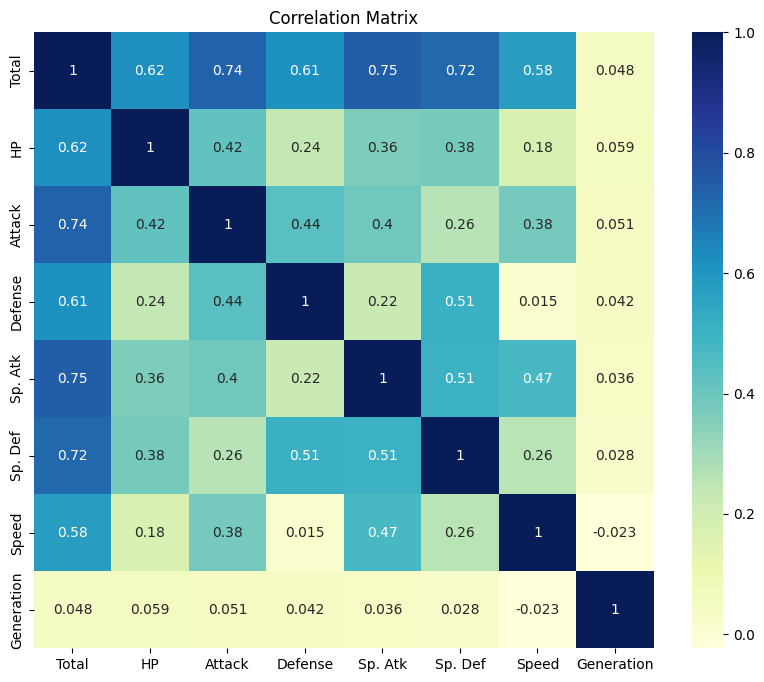

In [30]:
plt.figure(figsize =(10,8)) #increasing style
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu") #inferno - good colors
#annot - adding the values in it
#cmap - is the color palete
plt.title('Correlation Matrix')

In [ ]:
#SPURIOUS CORRELATIONS - values don't have to be linked, but can be correlated


<Axes: xlabel='Attack', ylabel='Defense'>

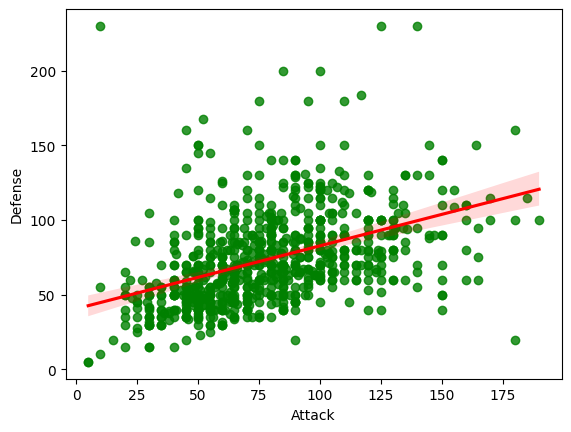

In [33]:
#LINEAR REGRESSION - one of simplest machine learning to build. You predict one value based on the other. Assumes there is some linear regression of your data
sns.regplot(x = 'Attack', y = 'Defense', data=pokemon_df, color = 'green', ci=99, line_kws=dict(color='r'))


<Axes: xlabel='Speed', ylabel='Defense'>

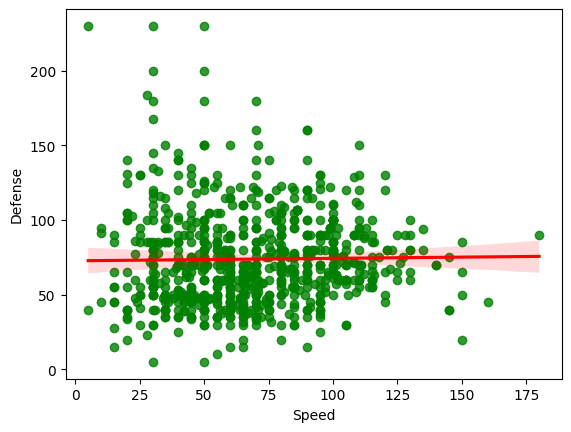

In [34]:
sns.regplot(x = 'Speed', y = 'Defense', data=pokemon_df, color = 'green', ci=99, line_kws=dict(color='r'))


### TEAMWORK

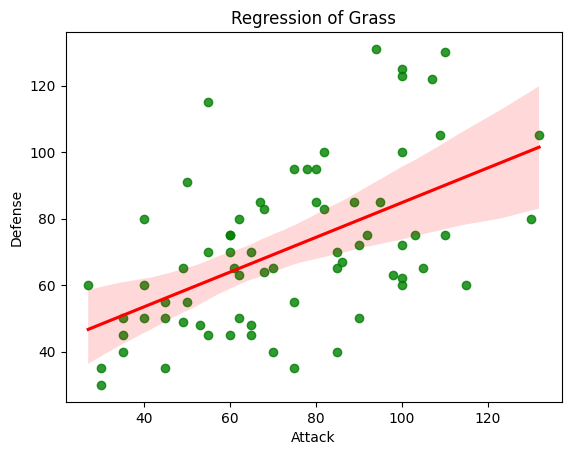

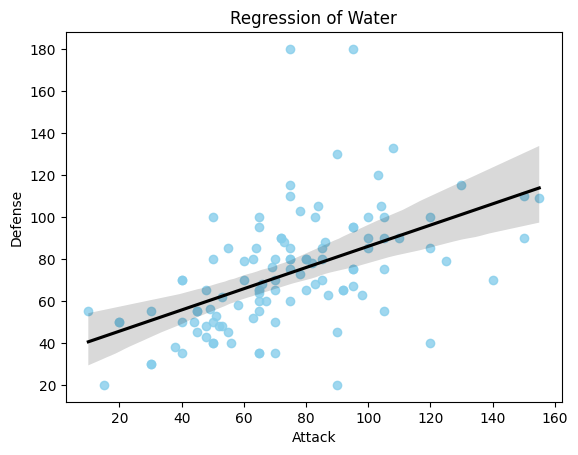

Correlation of water is: 0.5161628601933552
Correlation of grass is: 0.5407436570609248


In [46]:
#making data frames for grass & water
grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass']
water_df = pokemon_df[pokemon_df['Type 1']== 'Water']
#making regression for both of them
sns.regplot(x ='Attack', y = 'Defense', data = grass_df, color = 'green', ci=99, line_kws=dict(color='red'))
plt.title('Regression of Grass')
plt.show()
sns.regplot(x ='Attack', y = 'Defense', data = water_df, color = 'skyblue', ci=99, line_kws=dict(color='black'))
plt.title('Regression of Water')
plt.show()
#making pearson for each for them
corr_water = water_df['Attack'].corr(water_df['Defense'])
print(f'Correlation of water is: {corr_water}')
corr_grass = grass_df['Attack'].corr(grass_df['Defense'])
print(f'Correlation of grass is: {corr_grass}')